In [1]:
import numpy as np
import pandas as pd
import healpy as hp
import matplotlib.pyplot as plt
import matplotlib as mpl

## Load Data

The provided data file contains a table with columns indicating the healpix index (ipix), declination (dec), right ascension (ra), and the contributions to the GP template analyses for the experimental data (pi0, kra5, kra50) as well as for a background scramble (bkg_trial_pi0, 	bkg_trial_kra5, 	bkg_trial_kra50).

In [2]:
df_contribution = pd.read_csv('contribution_map.csv')
df_contribution

,ipix,dec,ra,pi0,kra5,kra50,bkg_trial_pi0,bkg_trial_kra5,bkg_trial_kra50
0,0,1.558038,0.785398,2.421328,0.306699,0.246313,0.190074,0.086134,0.071642
1,1,1.558038,2.356194,-1.387373,-1.231720,-0.887464,-0.423488,-0.041379,-0.032666
2,2,1.558038,3.926991,-1.751788,-1.397227,-1.013613,-0.522342,-0.057773,-0.045953
3,3,1.558038,5.497787,2.013140,0.301348,0.242407,0.079266,0.050724,0.042063
4,4,1.545280,0.392699,5.577044,1.284664,0.961026,0.691149,0.179338,0.147402
...,...,...,...,...,...,...,...,...,...
49147,49147,-1.545280,5.890486,-2.322990,-0.194786,-0.278216,-0.079977,0.051731,0.052001
49148,49148,-1.558038,0.785398,-1.365749,-0.250410,-0.327171,0.018091,0.037095,0.039909
49149,49149,-1.558038,2.356194,1.524469,0.915351,0.575247,0.435462,0.143856,0.130902
49150,49150,-1.558038,3.926991,2.939959,1.950966,1.380727,0.653533,0.244519,0.216833


## Plot contribution to test-statistic

Each TS contribution is loaded in, they are binned with healpix with NSIDE = 64 in equatorial Coordinates.
For Figure 3 these were plotted only around the galactic center for each.  Here we provide the full maps.
Below they are plotted for the full sky with the same colorbar as the paper using a Mollweide Projection

/home/mhuennefeld/software/virtualenvs/tensorflow2.3_py3-v4.1.0_csky/lib/python3.7/site-packages/healpy/projaxes.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  **kwds
/home/mhuennefeld/software/virtualenvs/tensorflow2.3_py3-v4.1.0_csky/lib/python3.7/site-packages/healpy/projaxes.py:543: UserWarning: 0.0 180.0 -180.0 180.0
  pmin / dtor, pmax / dtor, mmin / dtor, mmax / dtor
/home/mhuennefeld/software/virtualenvs/tensorflow2.3_py3-v4.1.0_csky/lib/python3.7/site-packages/healpy/projaxes.py:658: UserWarning: The interval between parallels is 30 deg -0.00'.
  vdeg, varcmin
/home/mhuennefeld/software/virtualenvs/tensorflow2.3_py3-v4.1.0_csky/lib/python3.7/site-packages/healpy/projaxes.py:666: UserWarning: The interval between meridians is 30 deg -0.00'.
  vdeg, varcmin


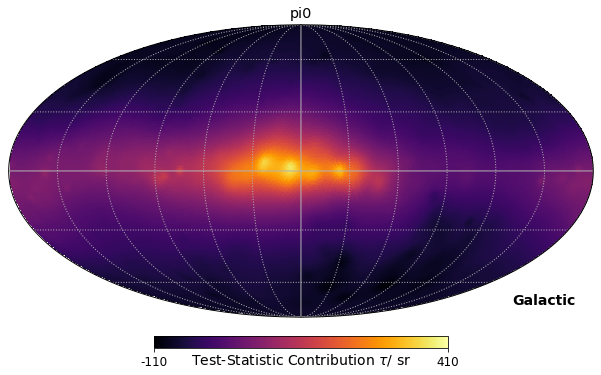

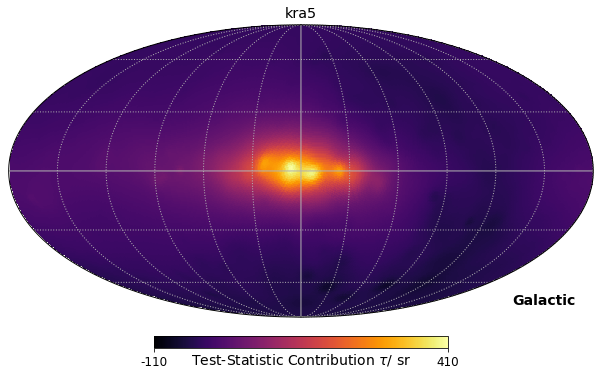

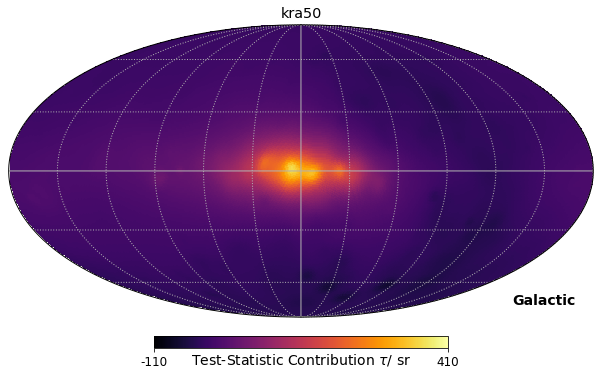

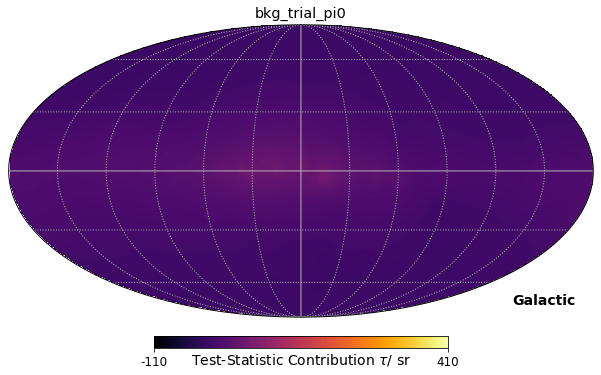

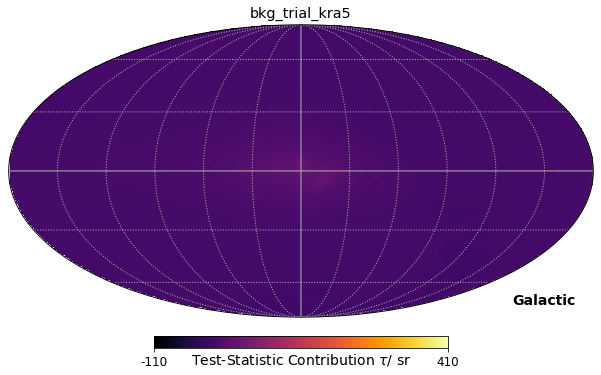

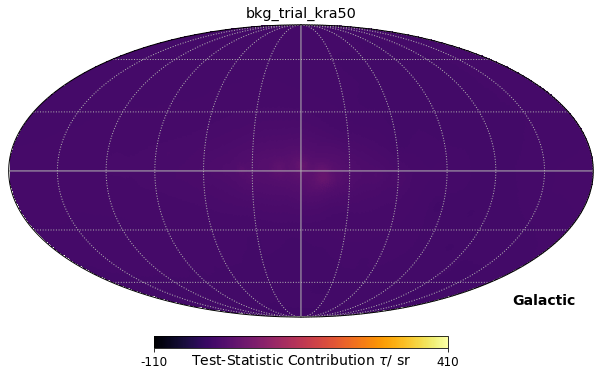

In [3]:
import matplotlib.patheffects as pe

# ---------------
# define colormap
# ---------------
cmap = plt.cm.inferno  
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(-110, 410, 72)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# ---------------

# Define figure layout and axes
plt.rcParams.update({'font.size': 12})
fontsize_title = 19
fontsize_cb_label = 14
fontsize_text = 15
for i, key in enumerate(['pi0', 'kra5', 'kra50', 'bkg_trial_pi0', 'bkg_trial_kra5', 'bkg_trial_kra50']):
    hp.mollview(df_contribution[key],  fig=i, cmap=cmap, coord='CG', title=key,
                unit=r'Test-Statistic Contribution $\tau$/ sr', min=-110, max=410)
    hp.graticule(c='0.7')
